# **Introduzione al Machine Learning -- laboratorio 7 e 8**


* Combinatoria nel Risiko (sort, reshape, `array[:,0,:]`, copy)
* Distribuzioni bivariate empiriche (media, varianza, covarianza, correlazione)
* PCA (inizio)



In [ ]:
# Numero di casi totali
max_cases = 6**6
print(max_cases)

46656


Devo enumerare tutti i casi

In [ ]:
def to_base(n, base=6, digits=6):
  max_n = base**digits
  n = n % max_n # Tiene le ultime digits cifre e butta via le altre
  ret = []
  for i in range(digits):
    max_n = max_n // base
    ret.append(n // max_n)
    n = n % max_n
  return ret

In [ ]:
to_base(753648, 10, 8)

[0, 0, 7, 5, 3, 6, 4, 8]

In [ ]:
import numpy as np

cases = np.array([to_base(n) for n in range(max_cases)]) + 1
cases

array([[1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 2],
       [1, 1, 1, 1, 1, 3],
       ...,
       [6, 6, 6, 6, 6, 4],
       [6, 6, 6, 6, 6, 5],
       [6, 6, 6, 6, 6, 6]])

In [ ]:
cases.shape

(46656, 6)

In [ ]:
cases.reshape((46656, 3, 2))

array([[[1, 1],
        [1, 1],
        [1, 1]],

       [[1, 1],
        [1, 1],
        [1, 2]],

       [[1, 1],
        [1, 1],
        [1, 3]],

       ...,

       [[6, 6],
        [6, 6],
        [6, 4]],

       [[6, 6],
        [6, 6],
        [6, 5]],

       [[6, 6],
        [6, 6],
        [6, 6]]])

In [ ]:
cases.reshape((-1, 2, 3))[12000]

array([[2, 4, 2],
       [4, 3, 1]])

In [ ]:
test = cases.copy()

In [ ]:
test = test.reshape((-1, 2, 3))

In [ ]:
test.sort()

In [ ]:
test.reshape((-1, 2, 3))[12000]

array([[2, 2, 4],
       [1, 3, 4]])

In [ ]:
test[:,0,:] # attaccante

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       ...,
       [6, 6, 6],
       [6, 6, 6],
       [6, 6, 6]])

In [ ]:
wins = np.greater(test[:,0,:], test[:,1,:])
wins

array([[False, False, False],
       [False, False, False],
       [False, False, False],
       ...,
       [ True, False, False],
       [ True, False, False],
       [False, False, False]])

In [ ]:
results = np.sum(wins, axis=-1)
results

array([0, 0, 0, ..., 1, 1, 0])

In [ ]:
res_cases = [sum(results == i) for i in range(4)]
res_cases

[17871, 12348, 10017, 6420]

In [ ]:
np.array(res_cases) / max_cases

array([0.38303755, 0.26466049, 0.21469907, 0.13760288])

In [ ]:
import pandas as pd
df = pd.read_excel('body.xlsx', index_col=0)
df

,Biacromial diameter (see Fig. 2),"Biiliac diameter, or ""pelvic breadth"" (see Fig. 2)",Bitrochanteric diameter (see Fig. 2),"Chest depth between spine and sternum at nipple level,","Chest diameter at nipple level, mid-expiration","Elbow diameter, sum of two elbows","Wrist diameter, sum of two wrists","Knee diameter, sum of two knees","Ankle diameter, sum of two ankles",Shoulder girth over deltoid muscles,...,"Bicep girth, flexed, average of right and left girths","Forearm girth, extended, palm up, average of right and","Knee girth over patella, slightly flexed position, average","Calf maximum girth, average of right and left girths","Ankle minimum girth, average of right and left girths","Wrist minimum girth, average of right and left girths",Age (years),Weight (kg),Height (cm),"Gender (1 - male, 0 - female)"
Id,,,,,,,,,,,,,,,,,,,,,
1,42.9,26.0,31.5,17.7,28.0,13.1,10.4,18.8,14.1,106.2,...,32.5,26.0,34.5,36.5,23.5,16.5,21,65.6,174.0,1
2,43.7,28.5,33.5,16.9,30.8,14.0,11.8,20.6,15.1,110.5,...,34.4,28.0,36.5,37.5,24.5,17.0,23,71.8,175.3,1
3,40.1,28.2,33.3,20.9,31.7,13.9,10.9,19.7,14.1,115.1,...,33.4,28.8,37.0,37.3,21.9,16.9,28,80.7,193.5,1
4,44.3,29.9,34.0,18.4,28.2,13.9,11.2,20.9,15.0,104.5,...,31.0,26.2,37.0,34.8,23.0,16.6,23,72.6,186.5,1
5,42.5,29.9,34.0,21.5,29.4,15.2,11.6,20.7,14.9,107.5,...,32.0,28.4,37.7,38.6,24.4,18.0,22,78.8,187.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,38.0,30.4,32.9,17.0,27.1,12.9,10.4,19.5,14.4,108.4,...,30.3,25.4,37.7,37.9,22.4,15.4,29,71.8,176.5,0
504,35.3,28.7,30.4,17.7,25.6,12.4,9.8,17.3,13.6,99.3,...,30.1,23.6,35.6,33.3,22.4,15.2,21,55.5,164.4,0
505,34.7,24.9,24.7,17.3,24.2,12.0,10.2,18.0,13.6,91.9,...,27.4,24.0,34.4,34.1,21.2,15.5,33,48.6,160.7,0


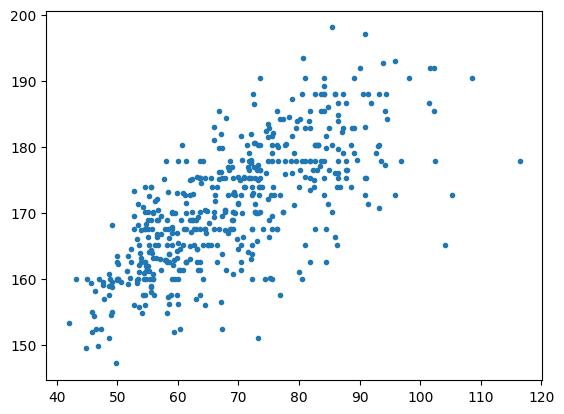

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df['Weight (kg)'], df['Height (cm)'], '.')

In [ ]:
mu = df.mean() # media campionaria
mu

Biacromial diameter (see Fig. 2)                               38.811440
Biiliac diameter, or "pelvic breadth" (see Fig. 2)             27.829980
Bitrochanteric diameter (see Fig. 2)                           31.980473
Chest depth between spine and sternum at nipple level,         19.226036
Chest diameter at nipple level, mid-expiration                 27.973767
Elbow diameter, sum of two elbows                              13.385207
Wrist diameter, sum of two wrists                              10.542604
Knee diameter, sum of two knees                                18.810651
Ankle diameter, sum of two ankles                              13.863314
Shoulder girth over deltoid muscles                           108.195069
Chest girth, nipple line in males and just above breast        93.333531
Waist girth, narrowest part of torso below the rib cage,       76.979487
Navel (or "Abdominal") girth at umbilicus and iliac crest,     85.653846
Hip girth at level of bitrochanteric diameter      

In [ ]:
df.to_numpy()

array([[ 42.9,  26. ,  31.5, ...,  65.6, 174. ,   1. ],
       [ 43.7,  28.5,  33.5, ...,  71.8, 175.3,   1. ],
       [ 40.1,  28.2,  33.3, ...,  80.7, 193.5,   1. ],
       ...,
       [ 34.7,  24.9,  24.7, ...,  48.6, 160.7,   0. ],
       [ 38.5,  29. ,  32.9, ...,  66.4, 174. ,   0. ],
       [ 35.6,  29. ,  29. , ...,  67.3, 163.8,   0. ]])

In [ ]:
mu.to_numpy()

array([ 38.81143984,  27.82998028,  31.98047337,  19.2260355 ,
        27.97376726,  13.3852071 ,  10.54260355,  18.81065089,
        13.86331361, 108.19506903,  93.33353057,  76.97948718,
        85.65384615,  96.68086785,  56.85581854,  31.16962525,
        25.94299803,  36.20295858,  36.07830375,  22.15739645,
        16.0974359 ,  30.18145957,  69.14753452, 171.14378698,
         0.48717949])

In [ ]:
cov = df.cov()
cov

,Biacromial diameter (see Fig. 2),"Biiliac diameter, or ""pelvic breadth"" (see Fig. 2)",Bitrochanteric diameter (see Fig. 2),"Chest depth between spine and sternum at nipple level,","Chest diameter at nipple level, mid-expiration","Elbow diameter, sum of two elbows","Wrist diameter, sum of two wrists","Knee diameter, sum of two knees","Ankle diameter, sum of two ankles",Shoulder girth over deltoid muscles,...,"Bicep girth, flexed, average of right and left girths","Forearm girth, extended, palm up, average of right and","Knee girth over patella, slightly flexed position, average","Calf maximum girth, average of right and left girths","Ankle minimum girth, average of right and left girths","Wrist minimum girth, average of right and left girths",Age (years),Weight (kg),Height (cm),"Gender (1 - male, 0 - female)"
Biacromial diameter (see Fig. 2),9.358288,2.085803,3.021133,4.488990,6.450834,3.169517,2.088227,2.621736,2.523839,25.155392,...,9.030210,6.517215,4.067061,4.449893,3.438038,3.259575,2.530331,29.616095,21.552383,1.186115
"Biiliac diameter, or ""pelvic breadth"" (see Fig. 2)",2.085803,4.867795,3.017642,1.980443,2.003219,0.963705,0.581803,1.301637,1.013612,6.346018,...,2.802652,1.809104,2.728587,2.557509,1.379837,0.802073,5.254826,14.597505,7.916531,0.127658
Bitrochanteric diameter (see Fig. 2),3.021133,3.017642,4.124618,2.414541,2.918380,1.444592,0.897889,1.664833,1.254994,10.087749,...,4.141342,2.748351,3.313793,3.429417,2.038870,1.344831,5.291100,18.043894,9.271371,0.266646
"Chest depth between spine and sternum at nipple level,",4.488990,1.980443,2.414541,6.329637,4.587423,2.264299,1.444817,1.865691,1.876174,19.252994,...,7.830852,5.109946,3.711919,3.965487,2.751941,2.363328,7.624515,26.885598,13.085953,0.771481
"Chest diameter at nipple level, mid-expiration",6.450834,2.003219,2.918380,4.587423,7.516642,2.814789,1.892286,2.435003,2.286269,24.764851,...,9.225644,6.263601,4.254722,4.660240,3.242339,2.880763,5.081252,30.422791,16.168364,0.964189
"Elbow diameter, sum of two elbows",3.169517,0.963705,1.444592,2.264299,2.814789,1.830354,1.073122,1.333656,1.385642,11.502219,...,4.624056,3.286507,2.092850,2.234165,1.673400,1.580100,2.581543,14.466001,9.394009,0.523229
"Wrist diameter, sum of two wrists",2.088227,0.581803,0.897889,1.444817,1.892286,1.073122,0.891818,0.906719,0.909906,7.626436,...,3.056751,2.177789,1.438352,1.563614,1.151423,1.124853,1.879013,9.636489,6.022874,0.343433
"Knee diameter, sum of two knees",2.621736,1.301637,1.664833,1.865691,2.435003,1.333656,0.906719,1.816013,1.215767,9.532325,...,3.899791,2.748909,2.588486,2.632880,1.643103,1.360680,2.231463,13.777141,7.455343,0.366738
"Ankle diameter, sum of two ankles",2.523839,1.013612,1.254994,1.876174,2.286269,1.385642,0.909906,1.215767,1.555885,8.956657,...,3.635563,2.595968,1.770800,1.930942,1.573197,1.313839,2.864971,12.093407,8.054870,0.429964
Shoulder girth over deltoid muscles,25.155392,6.346018,10.087749,19.252994,24.764851,11.502219,7.626436,9.532325,8.956657,107.637189,...,39.443170,26.282801,16.967129,18.525683,13.133880,12.044770,17.628367,121.683456,64.974564,4.054779


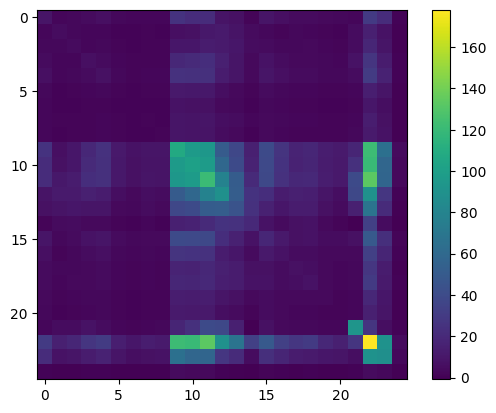

In [ ]:
plt.imshow(cov)
plt.colorbar()
plt.show()

In [ ]:
df.var()

Biacromial diameter (see Fig. 2)                                9.358288
Biiliac diameter, or "pelvic breadth" (see Fig. 2)              4.867795
Bitrochanteric diameter (see Fig. 2)                            4.124618
Chest depth between spine and sternum at nipple level,          6.329637
Chest diameter at nipple level, mid-expiration                  7.516642
Elbow diameter, sum of two elbows                               1.830354
Wrist diameter, sum of two wrists                               0.891818
Knee diameter, sum of two knees                                 1.816013
Ankle diameter, sum of two ankles                               1.555885
Shoulder girth over deltoid muscles                           107.637189
Chest girth, nipple line in males and just above breast       100.553182
Waist girth, narrowest part of torso below the rib cage,      121.279302
Navel (or "Abdominal") girth at umbilicus and iliac crest,     88.814190
Hip girth at level of bitrochanteric diameter      

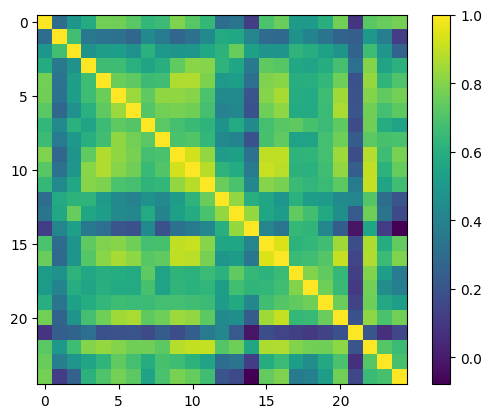

In [ ]:
corr = df.corr()
plt.imshow(corr)
plt.colorbar()
plt.show()

<Axes: ylabel='Frequency'>

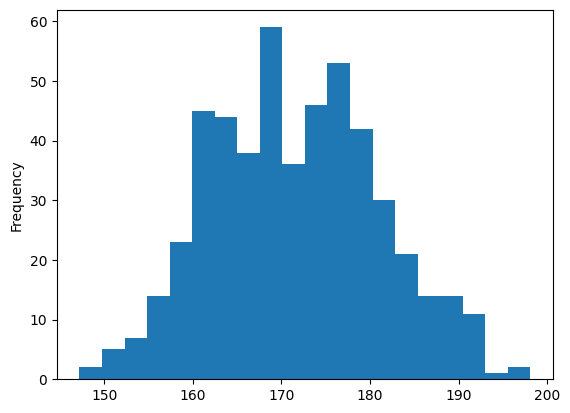

In [ ]:
df['Height (cm)'].plot.hist(bins=20)

<Axes: ylabel='Density'>

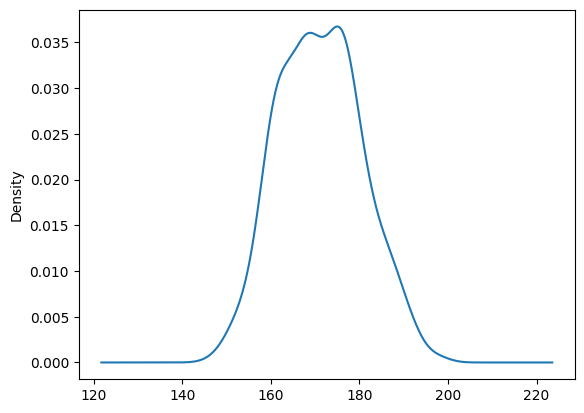

In [ ]:
df['Height (cm)'].plot.kde()

<Axes: xlabel='Height (cm)', ylabel='Density'>

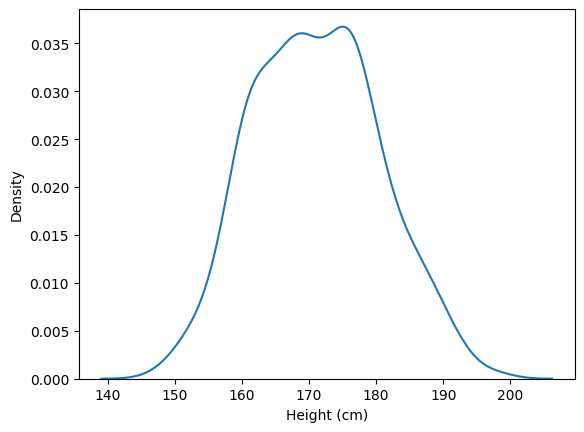

In [ ]:
import seaborn as sns

sns.kdeplot(df['Height (cm)'])

In [ ]:
df['Gender (1 - male, 0 - female)']==0

Id
1      False
2      False
3      False
4      False
5      False
       ...  
503     True
504     True
505     True
506     True
507     True
Name: Gender (1 - male, 0 - female), Length: 507, dtype: bool

In [ ]:
female_h = df['Height (cm)'][df['Gender (1 - male, 0 - female)']==0]
male_h = df['Height (cm)'][df['Gender (1 - male, 0 - female)']==1]

[]

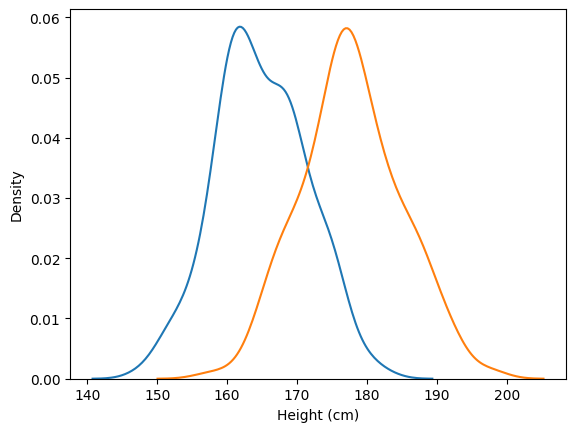

In [ ]:
sns.kdeplot(female_h)
sns.kdeplot(male_h)
plt.plot()

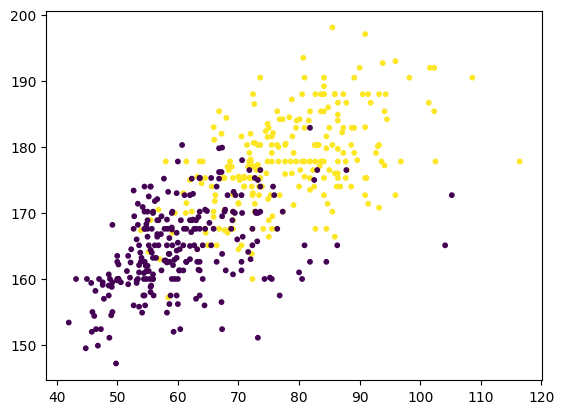

In [ ]:
plt.scatter(df['Weight (kg)'], df['Height (cm)'], s=10, c=df['Gender (1 - male, 0 - female)'])

In [ ]:
from sklearn import decomposition

pca = decomposition.PCA()
pca.fit(df)

PCA()

In [ ]:
dir(pca)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_fit',
 '_fit_full',
 '_fit_svd_solver',
 '_fit_truncated',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_n_features_out',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sklearn_auto_wrap_output_keys',
 '_validate_data',
 '_validate_params',
 'components_',
 'copy',
 'explained_variance_',
 'explained_variance_ratio_',
 'feature_names_in_',
 'fit',
 'fit_transform',
 'get_covariance',
 'get_feature_names_out',
 'get_params',
 'get_preci

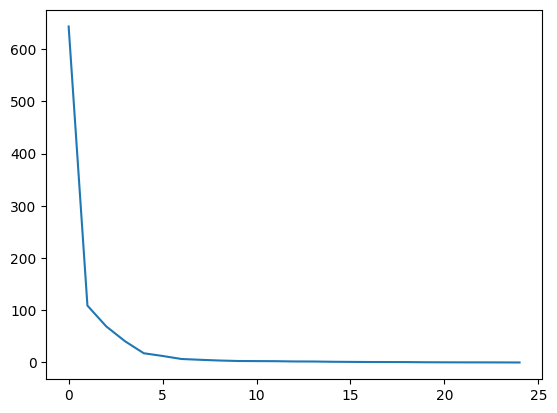

In [ ]:
plt.plot(pca.explained_variance_)

Sta usando la matrice di covarianza!!

In [ ]:
std_df = (df - df.mean())/df.std()

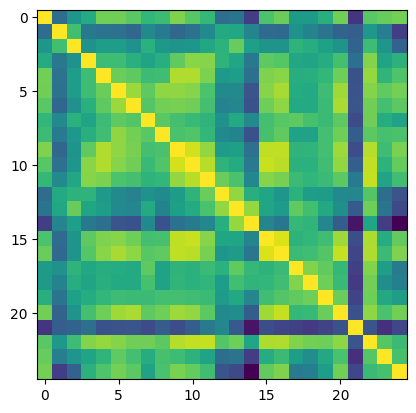

In [ ]:
plt.imshow(std_df.cov())

In [ ]:
pca.fit(std_df)

PCA()

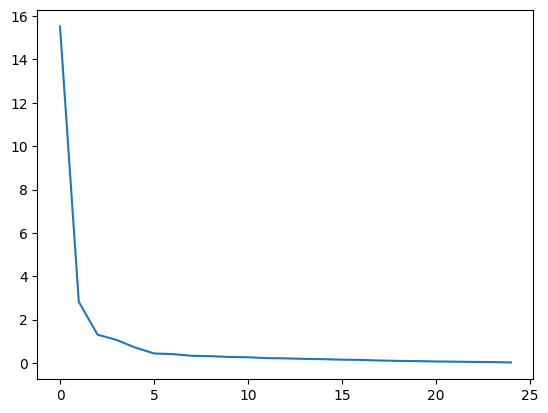

In [ ]:
plt.plot(pca.explained_variance_)

In [ ]:
sum(pca.explained_variance_)

25.000000000000004